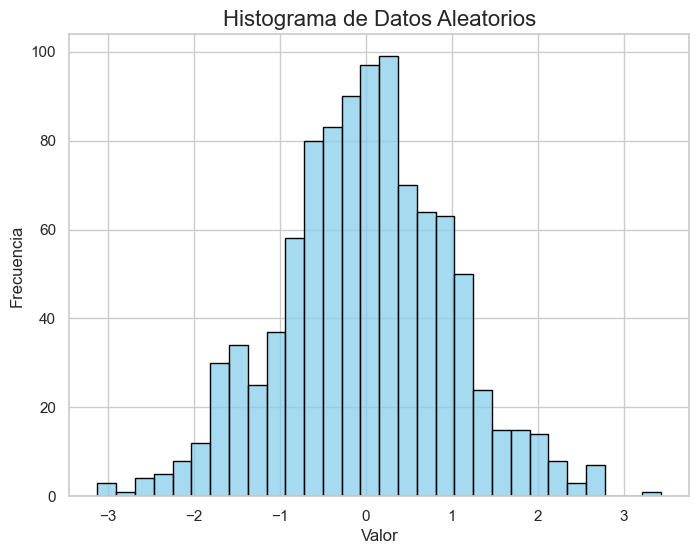

In [2]:
# Importar las librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos (opcional pero recomendado para modelos lineales como la regresión logística)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo de regresión logística
logistic_model = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=200)

# Definir la grilla de hiperparámetros a buscar
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularización inversa
    'penalty': ['l1', 'l2'],       # Tipo de penalización
}

# Configurar GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Ver los mejores hiperparámetros encontrados por GridSearchCV
print("Mejores hiperparámetros: ", grid_search.best_params_)

# Evaluar el modelo en el conjunto de prueba
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
